### Comparing Data to Model

How does varying length of sample affect strain and slope?  How does the data compare to the model?

In [1]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np

### Grab Datasets

In [5]:
# 1.53 in length
short = os.path.join(path_to_repository , "CSV Data/11_27_2024/1_53_bubble/second test/*.csv")

# 1.822 in length
medium = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/0 deg/*.csv")

# 2.3 in length
long = os.path.join(path_to_repository , "CSV Data/11_25_24/reapply/2p3/*.csv")

DS_all = [short, medium, long]


# Plot norm data from three different samples and compare to model

['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_27_2024/1_53_bubble/second test\\Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv']
ADC normalized with initial value R₀: -98.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized with initial value R₀: -103.0
['C:/Users/toppenheim/Desktop/UCSF/Preeya UCB/Strain-Sensor-/Strain-Sensor-\\CSV Data/11_25_24/reapply/2p3\\Bending_data_abs_2p3_11_25_24_0deg_reapply_1.csv']
ADC normalized with initial value R₀: -114.0


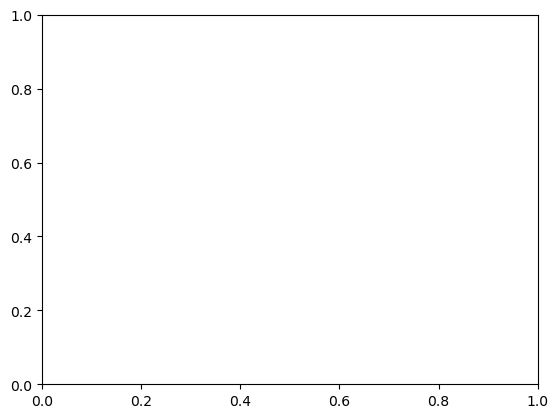

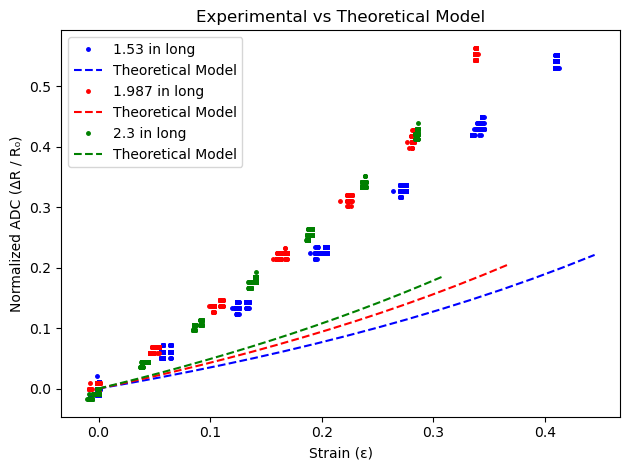

In [6]:
# Import matplotlib to ensure plotting works
import matplotlib.pyplot as plt

# first model and dataset
g = bender_class()
g.load_data(short)
g.normalize_adc_over_R0()

thick = 0.05 + 0.25 + 0.125
l_ch = 2.75
l_sam = 1.53
area = 0.02 * 0.02
res = 0.5

# Create a figure and axes before plotting
fig, ax = plt.subplots()  # This explicitly creates the `ax` object
ax = g.plot_mech_model_data(thick, l_ch, l_sam, area, res, scatter=False, data_color='blue', 
                            model_color='blue', data_label='1.53 in long', model_label='Theoretical Model', ax=None) # get this info from spreadsheet

# second model and dataset
g.load_data(medium)
g.normalize_adc_over_R0()

# Parameters for the second model
thick2 = 0.08 + 0.25 + 0.125
l_ch2 = 3.37
l_sam2 = 1.987
area2 = 0.02 * 0.02
res2 = 0.5

# Add the second dataset and model to the same plot
g.plot_mech_model_data(thick2, l_ch2, l_sam2, area2, res2, scatter=False, data_color='red', 
                       model_color='red', data_label='1.987 in long', model_label='Theoretical Model',  ax=ax)

# third model and dataset
g.load_data(long)
g.normalize_adc_over_R0()

# Parameters for the third model
thick3 = 0.07 + 0.25 + 0.125
l_ch3 = 3.86
l_sam3 = 2.3
area3 = 0.02 * 0.02
res3 = 0.5

# Add the third dataset and model to the same plot
g.plot_mech_model_data(thick3, l_ch3, l_sam3, area3, res3, scatter=False, data_color='green', 
                       model_color='green', data_label='2.3 in long', model_label='Theoretical Model', ax=ax)

# Show the combined plot
plt.tight_layout()
plt.show()